# Mengidentifikasi Pola Belanja Pelanggan Bagi Orang Tua Yang Sudah Memiliki Anak

# Sales Customer

Sebelum mengerjakan, kita perlu mengunduh Library Python berikut.

In [102]:
!pip install pandas
!pip install numpy 
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Understanding

Cuplikan kode Python untuk membaca data dari file CSV 'Data Capstone Modul 2 Supermarket Customers.csv' menggunakan pandas dan menampilkan DataFrame. DataFrame berisi 2240 baris dan 29 kolom, dengan kolom seperti ID, Year_Birth, Education, Marital_Status, Income, dan lainnya.

In [104]:
# menampilkan data
df = pd.read_csv('Data Capstone Modul 2 Supermarket Customers.csv', sep='\t')
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Cuplikan kode Python untuk menampilkan informasi tipe data dari DataFrame menggunakan `df.info()`. DataFrame memiliki 2240 entri dengan 29 kolom, seperti ID, Year_Birth, Education, dan lainnya. Semua kolom memiliki 2240 entri non-null, dengan tipe data: float64 (1 kolom), int64 (25 kolom), dan object (3 kolom).

In [105]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Saya memilih untuk menghapus kolom 'Z_REVENUE' dan 'Z_CostContact' dari DataFrame menggunakan `df.drop()` karena isi data dari kolom tersebut isinya sama semua, dan tidak berpengaruh apapun.

In [106]:
# menghapus kolom Z_Revenue dan Z_CostContact
df = df.drop(['Z_Revenue', 'Z_CostContact'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


Untuk melihat jumlah missing value yang ada pada tiap kolom.

In [107]:
# mengecek missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Cuplikan kode Python untuk mengubah tipe data kolom 'Year_Birth' dan 'Dt_Customer' menjadi datetime menggunakan `pd.to_datetime()`, serta mengubah kolom 'ID' menjadi string menggunakan `astype(str)`. Hasilnya, DataFrame memiliki 2240 entri dengan 27 kolom, dengan tipe data: datetime64[ns] (2 kolom)

In [108]:
# mengubah tipe data year_birth dan dt_customer menjadi datetime dan id menjadi object
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Menghapus semua missing value karena jumlah missing value yang sedikit

In [109]:
# menghapus missing value
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

Melihat apakah ada data yang sama.

In [110]:
# mengecek duplikat
df.duplicated().sum()

0

Menambah variabel baru dari variabel-variabel yang sudah ada untuk mendapatkan informasi yang lebih banyak

## Derived Metrics (Penambahan Kolom Baru)

In [111]:
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Loyalty'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['HaveChildren'] = df['Kidhome'] + df['Teenhome']
df['Married'] = (df['Marital_Status'] == 'Married').astype(int)
df['MarriedWithChildren'] = ((df['Marital_Status'] == 'Married') & (df['HaveChildren'] > 0)).astype(int)
df['MarriedWithNoChildren'] = ((df['Marital_Status'] == 'Married') & (df['HaveChildren'] == 0)).astype(int)


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     2216 non-null   object        
 1   Year_Birth             2216 non-null   datetime64[ns]
 2   Education              2216 non-null   object        
 3   Marital_Status         2216 non-null   object        
 4   Income                 2216 non-null   float64       
 5   Kidhome                2216 non-null   int64         
 6   Teenhome               2216 non-null   int64         
 7   Dt_Customer            2216 non-null   datetime64[ns]
 8   Recency                2216 non-null   int64         
 9   MntWines               2216 non-null   int64         
 10  MntFruits              2216 non-null   int64         
 11  MntMeatProducts        2216 non-null   int64         
 12  MntFishProducts        2216 non-null   int64         
 13  MntSweet

In [113]:
# mengecek missing value
df.isnull().sum()   

ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
TotalSpending            0
Loyalty                  0
HaveChildren             0
Married                  0
MarriedWithChildren      0
MarriedWithNoChildren    0
dtype: int64

In [114]:
# mengecek dupliakat
df.duplicated().sum()

0

Melihat variabel-variabel yang numerik saja dari dataset.

## Variabel Numerik

In [116]:
# memanggil variabel numerik saja kecuali kolom AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response, Kidhome, Teenhome
df_num = df.select_dtypes(include=['int64', 'float64']).drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Kidhome', 'Teenhome'], axis=1)
df_num


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,1617,32,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,27,11,2
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,776,25,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,53,14,1
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,422,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,1341,23,1
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,444,29,3
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,1241,25,0
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,843,26,1


In [117]:
# numerik deskriptif
df_num.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,607.075361,20.199910,0.947202
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,602.900476,7.283193,0.749062
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,69.000000,14.000000,0.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,396.500000,19.000000,1.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1048.000000,25.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2525.000000,46.000000,3.000000


In [118]:
df_num.info()
df_num.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   MntWines             2216 non-null   int64  
 3   MntFruits            2216 non-null   int64  
 4   MntMeatProducts      2216 non-null   int64  
 5   MntFishProducts      2216 non-null   int64  
 6   MntSweetProducts     2216 non-null   int64  
 7   MntGoldProds         2216 non-null   int64  
 8   NumDealsPurchases    2216 non-null   int64  
 9   NumWebPurchases      2216 non-null   int64  
 10  NumCatalogPurchases  2216 non-null   int64  
 11  NumStorePurchases    2216 non-null   int64  
 12  NumWebVisitsMonth    2216 non-null   int64  
 13  TotalSpending        2216 non-null   int64  
 14  Loyalty              2216 non-null   int64  
 15  HaveChildren         2216 non-null   int64 

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpending', 'Loyalty',
       'HaveChildren'],
      dtype='object')

Melihat visualisasi dari variabel-variabel numerik menggunakan histogram

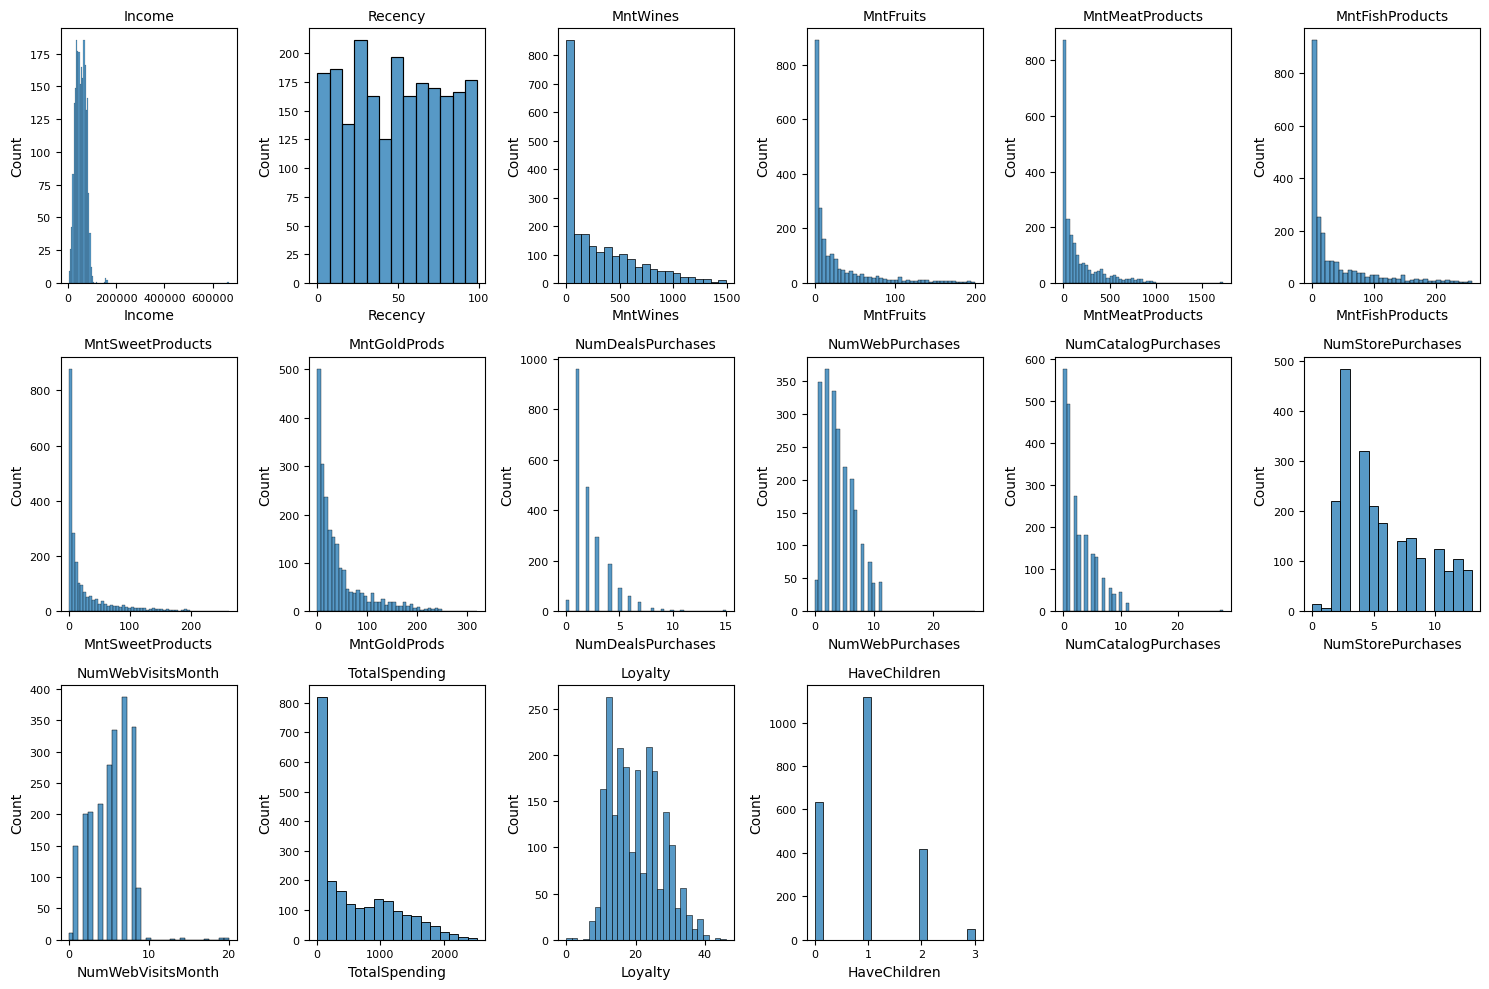

In [119]:
# Menggunakan kolom dari df_cat
kolom = df_num.columns
# Menghitung layout grid yang optimal
jumlah_kolom = len(kolom)
# Menggunakan 6 kolom seperti pada contoh Anda
grid_kolom = 6
grid_baris = math.ceil(jumlah_kolom / grid_kolom)

# Membuat figure
plt.figure(figsize=(15, 10))

# Looping untuk setiap kolom dan membuat histogram
for i, nama_kolom in enumerate(kolom, 1):
    # Memeriksa apakah kita sudah melebihi jumlah subplot yang dapat ditampilkan
    if i > grid_baris * grid_kolom:
        break
        
    # Membuat posisi subplot
    plt.subplot(grid_baris, grid_kolom, i)
    
    # Membuat histogram - dengan penanganan kesalahan jika kolom tidak ada
    try:
        sns.histplot(df[nama_kolom])
        plt.title(nama_kolom, fontsize=10)
    except KeyError:
        plt.text(0.5, 0.5, f"Kolom '{nama_kolom}' tidak ditemukan", 
                ha='center', va='center', transform=plt.gca().transAxes)
    
    # Mengurangi ukuran font label x dan y
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

Melihat variabel-variabel yang kategorik saja dari dataset.

## Variabel Kategorik

In [120]:
# memanggil variabel kategorik saja kecuali ID

df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.drop('ID', axis=1)
df_cat



,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [121]:
# kategorik deskriptif
df_cat.describe()
df_cat

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [122]:
df_cat.info()
df_cat.columns

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2216 non-null   object
 1   Marital_Status  2216 non-null   object
dtypes: object(2)
memory usage: 51.9+ KB


Index(['Education', 'Marital_Status'], dtype='object')

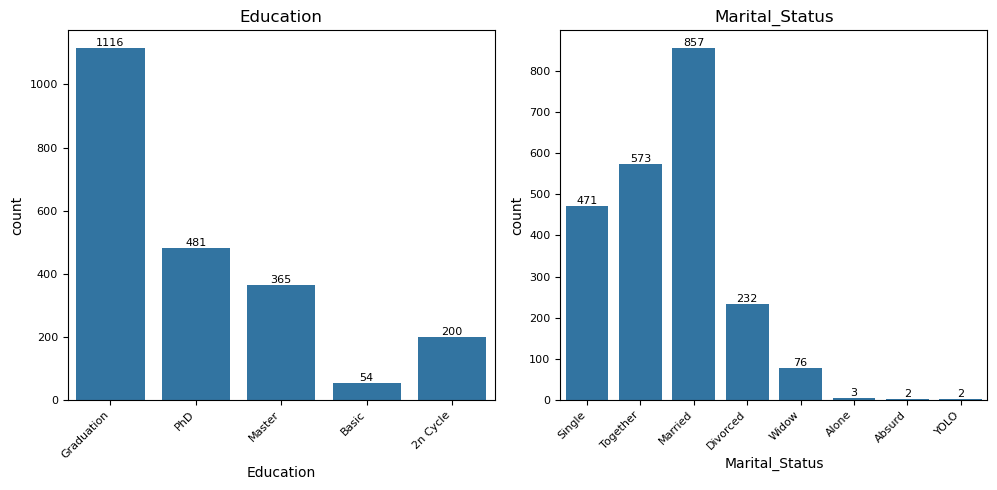

In [ ]:
# Menggunakan kolom dari df_cat
kolom = df_cat.columns

# Menghitung layout grid yang optimal
jumlah_kolom = len(kolom)
# Menggunakan grid yang sesuai dengan jumlah kolom kategorikal (3 kolom)
grid_kolom = 3  # Karena hanya ada 3 kolom kategorikal
grid_baris = math.ceil(jumlah_kolom / grid_kolom)

# Membuat figure
plt.figure(figsize=(15, 5))  # Ukuran yang lebih proporsional untuk 3 kolom

# Looping untuk setiap kolom dan membuat countplot (untuk data kategorikal)
for i, nama_kolom in enumerate(kolom, 1):
    # Membuat posisi subplot
    plt.subplot(grid_baris, grid_kolom, i)
    
    # Membuat countplot untuk data kategorikal
    try:
        # Menggunakan countplot dari seaborn untuk data kategorikal
        ax = sns.countplot(x=nama_kolom, data=df_cat)
        plt.title(nama_kolom, fontsize=12)
        
        # Memutar label pada sumbu x jika terlalu panjang
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(fontsize=8)
        
        # Menambahkan label jumlah di atas setiap bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=8)
    
    except Exception as e:
        plt.text(0.5, 0.5, f"Error: {str(e)}", 
                ha='center', va='center', transform=plt.gca().transAxes)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

### Uji Normalitas / Uji Asumsi

In [124]:
# uji normalitas (kolmogorov-smirnov)
from scipy.stats import kstest

for col in df_num.columns:
    stat, pval=kstest(df_num[col], 'norm')
    if pval < 0.05:
        print(f'{col} Distribusi tidak normal (Tolak H0)')
    else:
        print(f'{col} Distribusi normal (Terima H0)')

Income Distribusi tidak normal (Tolak H0)
Recency Distribusi tidak normal (Tolak H0)
MntWines Distribusi tidak normal (Tolak H0)
MntFruits Distribusi tidak normal (Tolak H0)
MntMeatProducts Distribusi tidak normal (Tolak H0)
MntFishProducts Distribusi tidak normal (Tolak H0)
MntSweetProducts Distribusi tidak normal (Tolak H0)
MntGoldProds Distribusi tidak normal (Tolak H0)
NumDealsPurchases Distribusi tidak normal (Tolak H0)
NumWebPurchases Distribusi tidak normal (Tolak H0)
NumCatalogPurchases Distribusi tidak normal (Tolak H0)
NumStorePurchases Distribusi tidak normal (Tolak H0)
NumWebVisitsMonth Distribusi tidak normal (Tolak H0)
TotalSpending Distribusi tidak normal (Tolak H0)
Loyalty Distribusi tidak normal (Tolak H0)
HaveChildren Distribusi tidak normal (Tolak H0)


In [125]:
# d'agustinus pearson
from scipy.stats import normaltest

for col in df_num.columns:
    stat, pval=normaltest(df_num[col])
    if pval < 0.05:
        print(f'{col} Terdapat korelasi (Tolak H0)')
    else:
        print(f'{col} Tidak terdapat korelasi (Terima H0)')

Income Terdapat korelasi (Tolak H0)
Recency Terdapat korelasi (Tolak H0)
MntWines Terdapat korelasi (Tolak H0)
MntFruits Terdapat korelasi (Tolak H0)
MntMeatProducts Terdapat korelasi (Tolak H0)
MntFishProducts Terdapat korelasi (Tolak H0)
MntSweetProducts Terdapat korelasi (Tolak H0)
MntGoldProds Terdapat korelasi (Tolak H0)
NumDealsPurchases Terdapat korelasi (Tolak H0)
NumWebPurchases Terdapat korelasi (Tolak H0)
NumCatalogPurchases Terdapat korelasi (Tolak H0)
NumStorePurchases Terdapat korelasi (Tolak H0)
NumWebVisitsMonth Terdapat korelasi (Tolak H0)
TotalSpending Terdapat korelasi (Tolak H0)
Loyalty Terdapat korelasi (Tolak H0)
HaveChildren Terdapat korelasi (Tolak H0)


## Outliers

### Boxplot

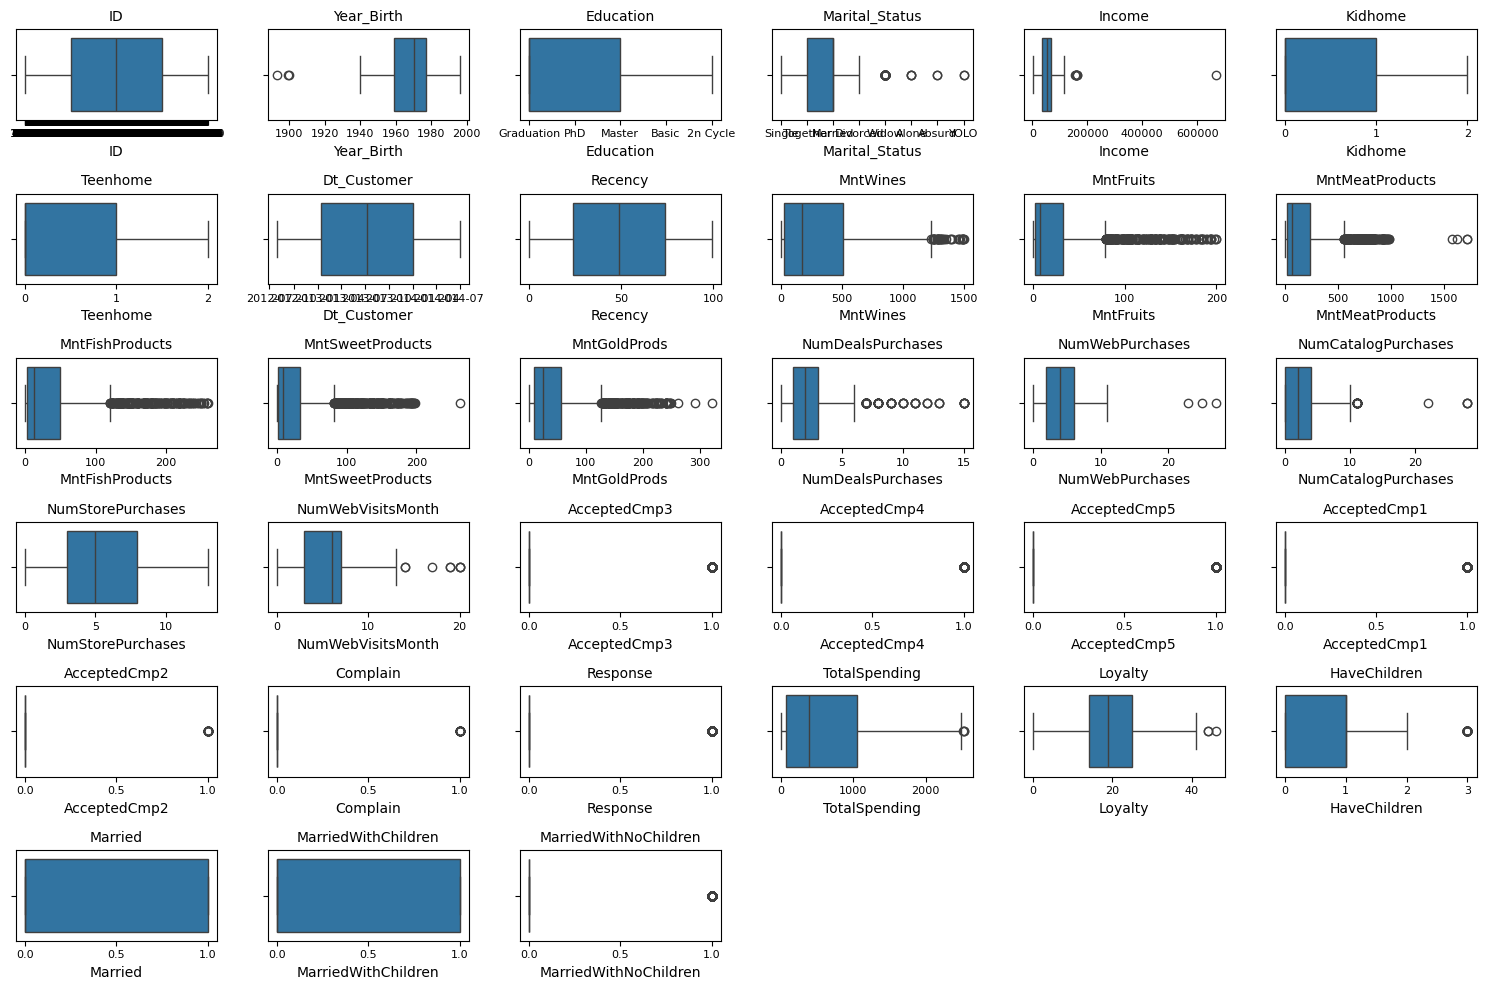

In [126]:
# mengecek outliers dengan boxplot
# Menggunakan kolom dari df_num berdasarkan gambar yang dikirimkan
kolom = df.columns  # Mengambil kolom dari df_num

# Menghitung layout grid yang optimal
jumlah_kolom = len(kolom)
# Menggunakan 6 kolom seperti pada contoh Anda
grid_kolom = 6
grid_baris = math.ceil(jumlah_kolom / grid_kolom)

# Membuat figure
plt.figure(figsize=(15, 10))

# Looping untuk setiap kolom dan membuat boxplot
for i, nama_kolom in enumerate(kolom, 1):
    # Memeriksa apakah kita sudah melebihi jumlah subplot yang dapat ditampilkan
    if i > grid_baris * grid_kolom:
        break
        
    # Membuat posisi subplot
    plt.subplot(grid_baris, grid_kolom, i)
    
    # Membuat boxplot
    try:
        sns.boxplot(x=df[nama_kolom])
        plt.title(nama_kolom, fontsize=10)
    except KeyError:
        plt.text(0.5, 0.5, f"Kolom '{nama_kolom}' tidak ditemukan", 
                ha='center', va='center', transform=plt.gca().transAxes)
    
    # Mengurangi ukuran font label x dan y
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

# Mengatur layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

In [127]:
# Mencoba mengecek outliers dengan IQR 1.5 pada Variabel Numerik
for nama_kolom in df_num.columns:
    q3 = df_num[nama_kolom].quantile(0.75)
    q1 = df_num[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df_num[(df[nama_kolom] > batas_atas) | (df_num[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers Income: 8
Jumlah Outliers Recency: 0
Jumlah Outliers MntWines: 35
Jumlah Outliers MntFruits: 246
Jumlah Outliers MntMeatProducts: 174
Jumlah Outliers MntFishProducts: 222
Jumlah Outliers MntSweetProducts: 246
Jumlah Outliers MntGoldProds: 205
Jumlah Outliers NumDealsPurchases: 84
Jumlah Outliers NumWebPurchases: 3
Jumlah Outliers NumCatalogPurchases: 23
Jumlah Outliers NumStorePurchases: 0
Jumlah Outliers NumWebVisitsMonth: 8
Jumlah Outliers TotalSpending: 3
Jumlah Outliers Loyalty: 3
Jumlah Outliers HaveChildren: 50


In [128]:
# Mencoba mengecek outliers dengan Z-Score pada Variabel Numerik
for nama_kolom in df_num.columns:
    mean = df_num[nama_kolom].mean()
    std = df_num[nama_kolom].std()
    jumlah_outliers = len(df_num[(df_num[nama_kolom] < mean - 3 * std) | (df_num[nama_kolom] > mean + 3 * std)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers Income: 8
Jumlah Outliers Recency: 0
Jumlah Outliers MntWines: 15
Jumlah Outliers MntFruits: 64
Jumlah Outliers MntMeatProducts: 39
Jumlah Outliers MntFishProducts: 58
Jumlah Outliers MntSweetProducts: 61
Jumlah Outliers MntGoldProds: 46
Jumlah Outliers NumDealsPurchases: 31
Jumlah Outliers NumWebPurchases: 3
Jumlah Outliers NumCatalogPurchases: 4
Jumlah Outliers NumStorePurchases: 0
Jumlah Outliers NumWebVisitsMonth: 9
Jumlah Outliers TotalSpending: 5
Jumlah Outliers Loyalty: 3
Jumlah Outliers HaveChildren: 0


#### Mengidentifikasi Outliers dan Handling

##### Income

In [129]:
# Mencari outlier pada Income yang lebih dari 600000
df[df['Income'] > 600000]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Loyalty,HaveChildren,Married,MarriedWithChildren,MarriedWithNoChildren
2233,9432,1977-01-01,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,0,0,62,17,1,0,0,0


In [130]:
# Mengecek outliers tersebut secara spesifik
df_num[df_num['Income'] > 600000]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
2233,666666.0,23,9,14,18,8,1,12,4,3,1,3,6,62,17,1


In [131]:
# menghapus outlier pada kolom Income yang lebih dari 600000
df = df[df['Income'] < 600000]


##### MntMeatProducts

In [132]:
# mencari outlier pada kolom MntMeatProducts yang lebih dari 1000 
df[df['MntMeatProducts'] > 1000]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Loyalty,HaveChildren,Married,MarriedWithChildren,MarriedWithNoChildren
21,5376,1979-01-01,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,0,0,0,1730,44,1,1,1,0
164,8475,1973-01-01,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,1608,37,1,1,1,0
687,1501,1982-01-01,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,0,0,0,0,1717,44,0,1,0,1
1653,4931,1977-01-01,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,0,0,0,0,1730,29,0,0,0,0


In [133]:
# Mengecek outliers tersebut secara spesifik
df_num[df_num['MntMeatProducts'] > 1000]


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
21,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,1730,44,1
164,157243.0,98,20,2,1582,1,2,1,15,0,22,0,0,1608,37,1
687,160803.0,21,55,16,1622,17,3,4,15,0,28,1,0,1717,44,0
1653,157146.0,13,1,0,1725,2,1,1,0,0,28,0,1,1730,29,0


In [134]:
# Menghapus data by indeks 21
df = df.drop(df.index[21])
df = df.reset_index(drop=True)

##### MntSweatProducts

In [135]:
# mencari outlier pada kolom MntSweatProducts yang lebih dari 200
df[df['MntSweetProducts'] > 200]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Loyalty,HaveChildren,Married,MarriedWithChildren,MarriedWithNoChildren
1880,4619,1945-01-01,PhD,Single,113734.0,0,0,2014-05-28,9,6,...,0,0,0,0,277,28,0,0,0,0


In [136]:
# Mengecek outliers tersebut secara spesifik
df_num[df_num['MntSweetProducts'] > 200]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
1898,113734.0,9,6,2,3,1,262,3,0,27,0,0,1,277,28,0


In [137]:
# Mengecek nilai tertinggi yg ada pada kolom loyalty and clv
df['Loyalty'].max()

46

In [138]:
# Memilih untuk tidak menghapus outlier pada kolom MntSweetProducts karena nilai Loyalty and clv yang tinggi (melebihi nilai median)

##### MntGoldProds

In [139]:
# Mencari outlier pada kolom MntGoldProds yang lebih dari 250
df[df['MntGoldProds'] > 250]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Loyalty,HaveChildren,Married,MarriedWithChildren,MarriedWithNoChildren
1314,4246,1982-01-01,Master,Single,6560.0,0,0,2013-12-12,2,67,...,0,0,0,0,373,19,0,0,0,0
1788,6237,1966-01-01,PhD,Single,7144.0,0,2,2013-12-07,92,81,...,0,0,0,0,416,25,2,0,0,0
1957,10311,1969-01-01,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,0,0,0,359,26,1,1,1,0


In [140]:
# Mengecek outliers tersebut secara spesifik
df_num[df_num['MntGoldProds'] > 250]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
1328,6560.0,2,67,11,26,4,3,262,0,1,0,1,17,373,19,0
1806,7144.0,92,81,4,33,5,2,291,0,23,1,1,0,416,25,2
1975,4428.0,0,16,4,12,2,4,321,0,25,0,0,1,359,26,1


In [141]:
# Menghapus data by indeks 1975 karena Education dan Incomenya yang tidak sesuai
df = df.drop(df.index[1975])
df = df.reset_index(drop=True)

In [142]:
# Melihat data pada kolom MarriedWithNoChildren
df[df['MarriedWithNoChildren'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpending,Loyalty,HaveChildren,Married,MarriedWithChildren,MarriedWithNoChildren
10,387,1976-01-01,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,0,0,0,0,61,14,0,1,0,1
13,2569,1987-01-01,Graduation,Married,17323.0,0,0,2012-10-10,38,3,...,0,0,0,0,46,13,0,1,0,1
19,9360,1982-01-01,Graduation,Married,37040.0,0,0,2012-08-08,41,86,...,0,0,0,0,316,20,0,1,0,1
26,1966,1965-01-01,PhD,Married,84618.0,0,0,2013-11-22,96,684,...,0,0,0,0,1672,28,0,1,0,1
31,8755,1946-01-01,Master,Married,68657.0,0,0,2013-02-20,4,482,...,0,0,0,0,1196,25,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,3266,1964-01-01,Graduation,Married,42523.0,0,0,2014-04-23,96,14,...,0,0,0,0,125,9,0,1,0,1
2162,5721,1956-01-01,PhD,Married,84117.0,0,0,2014-05-11,60,611,...,0,0,0,0,1566,26,0,1,0,1
2167,7990,1947-01-01,Graduation,Married,27469.0,0,0,2012-08-02,2,9,...,0,0,0,0,17,10,0,1,0,1
2168,8722,1957-01-01,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,1,0,0,1,1853,28,0,1,0,1


# Melihat korelasi antar variabel numerik

In [143]:
# Korelasi antar variable numerik

df_num.corr(method='spearman')

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalSpending,Loyalty,HaveChildren
Income,1.000000,0.007938,0.830056,0.582379,0.816815,0.577392,0.567087,0.505550,-0.195533,0.573262,0.791841,0.731752,-0.643667,0.850920,0.564308,-0.375991
Recency,0.007938,1.000000,0.016824,0.024804,0.026241,0.013278,0.024220,0.017290,0.008214,-0.002078,0.028665,0.003791,-0.018666,0.018856,0.004330,0.012781
MntWines,0.830056,0.016824,1.000000,0.516551,0.824089,0.522182,0.505361,0.575458,0.053550,0.742434,0.822926,0.805352,-0.390695,0.928394,0.774007,-0.335959
MntFruits,0.582379,0.024804,0.516551,1.000000,0.713574,0.704316,0.691066,0.569533,-0.111871,0.473336,0.633081,0.582166,-0.444309,0.683442,0.474533,-0.470760
MntMeatProducts,0.816815,0.026241,0.824089,0.713574,1.000000,0.725851,0.697815,0.639645,-0.033745,0.683491,0.853744,0.779894,-0.493880,0.940218,0.718380,-0.491675
MntFishProducts,0.577392,0.013278,0.522182,0.704316,0.725851,1.000000,0.700131,0.564654,-0.123880,0.466296,0.655878,0.580711,-0.459944,0.694671,0.472449,-0.496558
MntSweetProducts,0.567087,0.024220,0.505361,0.691066,0.697815,0.700131,1.000000,0.540616,-0.108031,0.462105,0.627996,0.581463,-0.448658,0.669823,0.471536,-0.464267
MntGoldProds,0.505550,0.017290,0.575458,0.569533,0.639645,0.564654,0.540616,1.000000,0.090165,0.577533,0.649036,0.540362,-0.258359,0.691691,0.587515,-0.318837
NumDealsPurchases,-0.195533,0.008214,0.053550,-0.111871,-0.033745,-0.123880,-0.108031,0.090165,1.000000,0.284461,-0.043862,0.096532,0.395857,-0.015500,0.405242,0.542705
NumWebPurchases,0.573262,-0.002078,0.742434,0.473336,0.683491,0.466296,0.462105,0.577533,0.284461,1.000000,0.621001,0.673902,-0.096936,0.729273,0.865465,-0.185707


<Axes: >

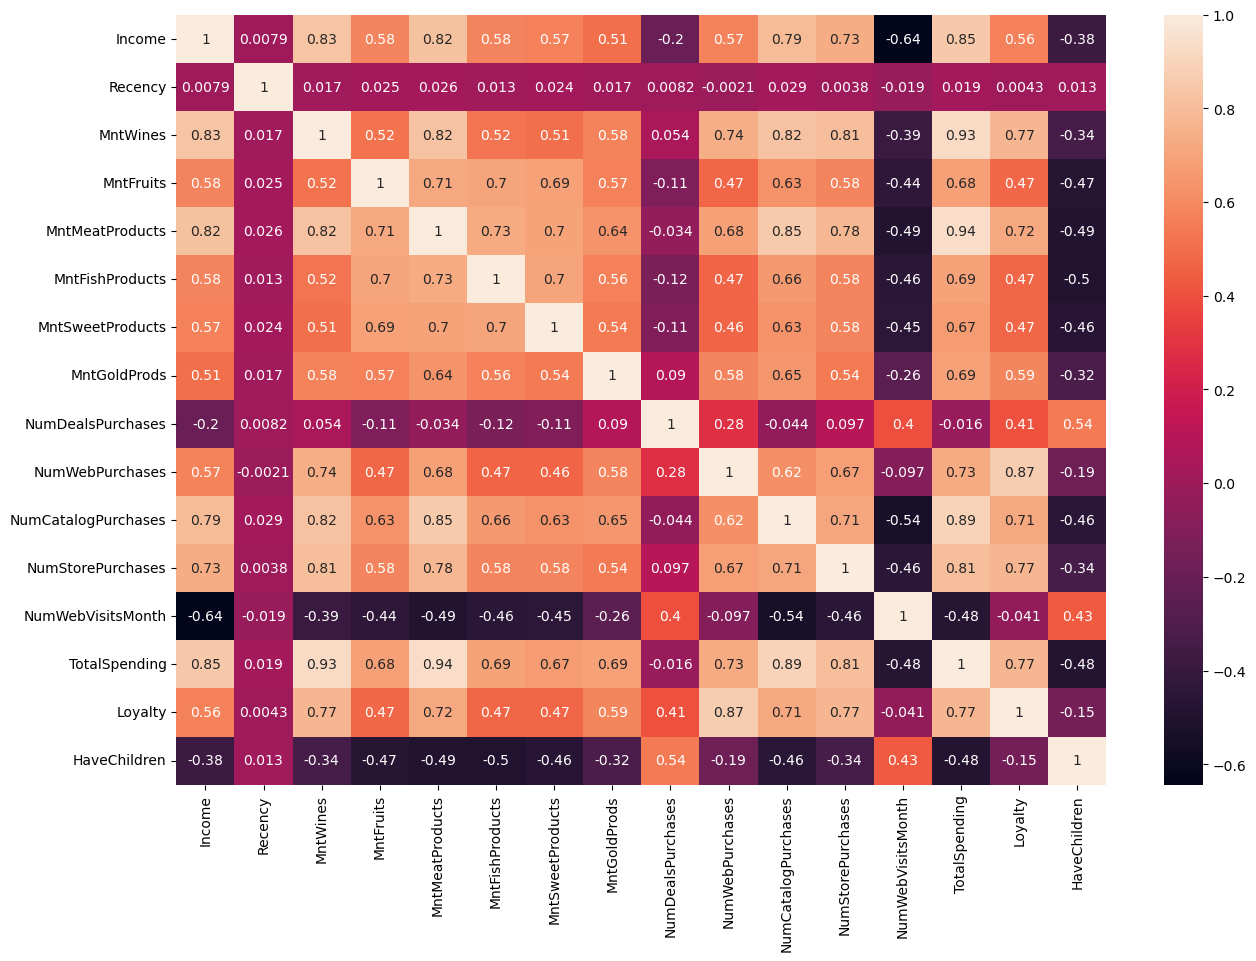

In [144]:
# korelasi spearman (distribusi tidak normal) dan menunjukkan nilai korelasi
figure = plt.figure(figsize=(15, 10))

sns.heatmap(df_num.corr(method='spearman'), annot=True) # defaultnya pearson


In [145]:
# Menyimpan data yang sudah bersih ke dalam file CSV

df.to_csv('1Data Capstone Modul 2 Supermarket Customers_SuperClean.csv', index=False)

In [146]:
df.info

<bound method DataFrame.info of          ID Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524 1957-01-01  Graduation         Single  58138.0        0         0   
1      2174 1954-01-01  Graduation         Single  46344.0        1         1   
2      4141 1965-01-01  Graduation       Together  71613.0        0         0   
3      6182 1984-01-01  Graduation       Together  26646.0        1         0   
4      5324 1981-01-01         PhD        Married  58293.0        1         0   
...     ...        ...         ...            ...      ...      ...       ...   
2208  10870 1967-01-01  Graduation        Married  61223.0        0         1   
2209   4001 1946-01-01         PhD       Together  64014.0        2         1   
2210   7270 1981-01-01  Graduation       Divorced  56981.0        0         0   
2211   8235 1956-01-01      Master       Together  69245.0        0         1   
2212   9405 1954-01-01         PhD        Married  52869.0        1         1

In [147]:
# melihat isi data dari kolom havechildren
df['HaveChildren'].value_counts()

HaveChildren
1    1114
0     633
2     416
3      50
Name: count, dtype: int64

In [148]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [149]:
def prepare_rules_viz(rules_df, segment_name):
    # Konversi rules_df ke DataFrame jika belum
    if not isinstance(rules_df, pd.DataFrame):
        rules_df = pd.DataFrame(rules_df)
    
    # Tambahkan kolom antecedent_len dan consequent_len
    rules_df['antecedent_len'] = rules_df['antecedents'].apply(lambda x: len(x))
    rules_df['consequent_len'] = rules_df['consequents'].apply(lambda x: len(x))
    
    # Filter rules yang memiliki 1 antecedent dan 1 consequent
    filtered = rules_df[(rules_df['antecedent_len'] == 1) & (rules_df['consequent_len'] == 1)]
    
    # Jika tidak ada rules yang memenuhi kriteria, kembalikan DataFrame kosong
    if filtered.empty:
        return pd.DataFrame(columns=['rule', 'lift', 'segment'])
    
    # Konversi frozenset menjadi string
    filtered['antecedents_str'] = filtered['antecedents'].apply(lambda x: list(x)[0] if len(x) > 0 else '')
    filtered['consequents_str'] = filtered['consequents'].apply(lambda x: list(x)[0] if len(x) > 0 else '')
    filtered['rule'] = filtered['antecedents_str'] + ' → ' + filtered['consequents_str']
    filtered['segment'] = segment_name
    
    return filtered[['rule', 'lift', 'segment']].head(5)

In [151]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Pastikan untuk menginstal mlxtend terlebih dahulu
# pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Matikan warning
warnings.filterwarnings('ignore')

# 1. Memuat Data
try:
    df = pd.read_csv('1Data Capstone Modul 2 Supermarket Customers_SuperClean.csv')
    print("Data berhasil dimuat dengan", len(df), "baris")
except Exception as e:
    print(f"Error saat memuat data: {e}")
    exit()

# 2. Memeriksa data
print("Jumlah baris dan kolom:", df.shape)
print("\nKolom yang tersedia:\n", df.columns.tolist())

# 3. Mengidentifikasi kategori produk yang akan dianalisis
product_categories = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# 4. Mengubah nama kategori menjadi lebih mudah dibaca
category_names = {
    'MntWines': 'Wine',
    'MntFruits': 'Fruits', 
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
}

# 5. Melihat statistik dari kategori produk
product_stats = pd.DataFrame({
    'Total': [df[col].sum() for col in product_categories],
    'Buyers': [df[df[col] > 0].shape[0] for col in product_categories],
    'Buyer_Percentage': [df[df[col] > 0].shape[0] / df.shape[0] * 100 for col in product_categories]
}, index=[category_names[col] for col in product_categories])

print("\nStatistik pembelian produk:")
print(product_stats.sort_values('Total', ascending=False))

# 6. Visualisasi total pembelian per kategori
plt.figure(figsize=(10, 6))
product_stats['Total'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Pembelian per Kategori Produk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_pembelian_per_kategori.png')
plt.close()

# 7. Visualisasi persentase pembeli per kategori
plt.figure(figsize=(10, 6))
product_stats['Buyer_Percentage'].sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Persentase Pembeli per Kategori Produk')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45)
plt.axhline(y=50, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('persentase_pembeli_per_kategori.png')
plt.close()

# 8. Mempersiapkan data untuk Market Basket Analysis
try:
    # Mengubah data menjadi format biner (1 jika pembeli membeli kategori, 0 jika tidak)
    basket_df = pd.DataFrame()
    for col in product_categories:
        basket_df[category_names[col]] = df[col].apply(lambda x: 1 if x > 0 else 0)

    print("\nData basket format biner (5 baris pertama):")
    print(basket_df.head())

    # 9. Menerapkan algoritma Apriori untuk menemukan frequent itemsets
    # min_support adalah persentase minimal transaksi yang mengandung itemset
    frequent_itemsets = apriori(basket_df, min_support=0.1, use_colnames=True)
    print(f"\nDitemukan {len(frequent_itemsets)} frequent itemsets")

    # 10. Membuat aturan asosiasi dari frequent itemsets
    # metric bisa berupa 'confidence', 'lift', 'leverage', atau 'conviction'
    # min_threshold adalah nilai minimal untuk metric yang dipilih
    if len(frequent_itemsets) > 0:
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
        
        if len(rules) > 0:
            # Mengurutkan rules berdasarkan lift
            rules = rules.sort_values('lift', ascending=False)
            
            print("\nTop 10 aturan asosiasi berdasarkan lift:")
            print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
            
            # 11. Menambahkan kolom untuk visualisasi
            rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
            rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))
            
            # Filter untuk menampilkan hanya aturan dengan 1 antecedent dan 1 consequent
            rules_filtered = rules[(rules['antecedent_len'] == 1) & (rules['consequent_len'] == 1)]
            
            # Cek apakah ada rules yang sesuai filter
            if not rules_filtered.empty:
                # Mengubah format frozenset menjadi string untuk visualisasi
                rules_filtered['antecedents_str'] = rules_filtered['antecedents'].apply(lambda x: list(x)[0])
                rules_filtered['consequents_str'] = rules_filtered['consequents'].apply(lambda x: list(x)[0])
                rules_filtered['rule'] = rules_filtered['antecedents_str'] + ' → ' + rules_filtered['consequents_str']
                
                # 12. Visualisasi aturan asosiasi (top 10)
                plt.figure(figsize=(12, 8))
                top_rules = rules_filtered.head(10)
                scatter = sns.scatterplot(
                    x='support', 
                    y='confidence', 
                    size='lift', 
                    data=top_rules, 
                    sizes=(100, 1000), 
                    hue='lift', 
                    palette='viridis'
                )
                
                # Menambahkan label untuk setiap titik
                for i, row in top_rules.iterrows():
                    plt.annotate(
                        row['rule'], 
                        (row['support'], row['confidence']), 
                        xytext=(5, 5), 
                        textcoords='offset points', 
                        fontsize=9
                    )
                
                plt.title('Visualisasi Aturan Asosiasi (Support vs Confidence, ukuran titik = Lift)')
                plt.xlabel('Support')
                plt.ylabel('Confidence')
                plt.tight_layout()
                plt.savefig('visualisasi_aturan_asosiasi.png')
                plt.close()
                
                # 13. Visualisasi lift untuk top 10 aturan
                plt.figure(figsize=(12, 6))
                plt.barh(top_rules['rule'], top_rules['lift'], color='teal')
                plt.title('Nilai Lift untuk 10 Aturan Asosiasi Teratas')
                plt.xlabel('Lift')
                plt.ylabel('Aturan')
                plt.tight_layout()
                plt.savefig('nilai_lift_aturan_asosiasi.png')
                plt.close()
            else:
                print("\nTidak ada aturan yang memenuhi kriteria filter (1 antecedent dan 1 consequent)")
        else:
            print("\nTidak ditemukan aturan asosiasi dengan kriteria yang diberikan")
    else:
        print("\nTidak ditemukan frequent itemsets dengan min_support yang diberikan")

except Exception as e:
    print(f"\nError saat melakukan MBA: {e}")
    import traceback
    traceback.print_exc()

# 14. Analisis berdasarkan segmen pendapatan
try:
    # Membuat segmen pendapatan
    def income_segment(income):
        if income < 30000:
            return 'Low'
        elif income < 70000:
            return 'Medium'
        else:
            return 'High'

    df['Income_Segment'] = df['Income'].apply(income_segment)

    # Menghitung jumlah pelanggan per segmen
    segment_counts = df['Income_Segment'].value_counts()
    print("\nJumlah pelanggan per segmen pendapatan:")
    print(segment_counts)

    # Visualisasi segmen pendapatan
    plt.figure(figsize=(8, 8))
    plt.pie(
        segment_counts, 
        labels=segment_counts.index, 
        autopct='%1.1f%%', 
        colors=['skyblue', 'lightgreen', 'salmon'], 
        startangle=90
    )
    plt.title('Segmentasi Pelanggan Berdasarkan Pendapatan')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('segmentasi_pelanggan.png')
    plt.close()

    # 15. Fungsi untuk menangani secara aman MBA per segmen
    def prepare_rules_viz(rules_df, segment_name):
        if rules_df.empty:
            return pd.DataFrame(columns=['rule', 'lift', 'segment'])
        
        # Tambahkan kolom untuk filter
        if 'antecedent_len' not in rules_df.columns:
            rules_df['antecedent_len'] = rules_df['antecedents'].apply(lambda x: len(x))
        
        if 'consequent_len' not in rules_df.columns:
            rules_df['consequent_len'] = rules_df['consequents'].apply(lambda x: len(x))
        
        # Filter
        filtered = rules_df[(rules_df['antecedent_len'] == 1) & (rules_df['consequent_len'] == 1)]
        
        if filtered.empty:
            return pd.DataFrame(columns=['rule', 'lift', 'segment'])
            
        # Format untuk visualisasi
        filtered['antecedents_str'] = filtered['antecedents'].apply(lambda x: list(x)[0])
        filtered['consequents_str'] = filtered['consequents'].apply(lambda x: list(x)[0])
        filtered['rule'] = filtered['antecedents_str'] + ' → ' + filtered['consequents_str']
        filtered['segment'] = segment_name
        
        return filtered[['rule', 'lift', 'segment']].head(5)

    # Fungsi untuk melakukan MBA pada segmen tertentu
    def segment_mba(segment_name):
        try:
            # Filter data untuk segmen tertentu
            segment_df = df[df['Income_Segment'] == segment_name]
            
            if len(segment_df) == 0:
                print(f"\nTidak ada data untuk segmen {segment_name}")
                return pd.DataFrame()
                
            # Membuat basket data untuk segmen
            segment_basket = pd.DataFrame()
            for col in product_categories:
                segment_basket[category_names[col]] = segment_df[col].apply(lambda x: 1 if x > 0 else 0)
            
            # Apriori
            segment_frequent = apriori(segment_basket, min_support=0.1, use_colnames=True)
            
            if len(segment_frequent) == 0:
                print(f"\nTidak ada frequent itemsets untuk segmen {segment_name}")
                return pd.DataFrame()
                
            # Association rules
            segment_rules = association_rules(segment_frequent, metric="lift", min_threshold=1.0)
            
            if len(segment_rules) == 0:
                print(f"\nTidak ada aturan asosiasi untuk segmen {segment_name}")
                return pd.DataFrame()
                
            # Sort berdasarkan lift
            segment_rules = segment_rules.sort_values('lift', ascending=False)
            
            print(f"\nTop 5 aturan asosiasi untuk segmen {segment_name}:")
            print(segment_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
            
            return segment_rules
            
        except Exception as e:
            print(f"\nError saat menganalisis segmen {segment_name}: {e}")
            return pd.DataFrame()

    # Melakukan MBA untuk setiap segmen
    low_rules = segment_mba('Low')
    medium_rules = segment_mba('Medium')
    high_rules = segment_mba('High')

    # 16. Visualisasi perbandingan lift antar segmen
    viz_rules_list = []

    # Hanya tambahkan jika ada data
    if not isinstance(low_rules, pd.DataFrame) or not low_rules.empty:
        viz_low = prepare_rules_viz(low_rules, 'Low Income')
        if not viz_low.empty:
            viz_rules_list.append(viz_low)
            
    if not isinstance(medium_rules, pd.DataFrame) or not medium_rules.empty:
        viz_medium = prepare_rules_viz(medium_rules, 'Medium Income')
        if not viz_medium.empty:
            viz_rules_list.append(viz_medium)
            
    if not isinstance(high_rules, pd.DataFrame) or not high_rules.empty:
        viz_high = prepare_rules_viz(high_rules, 'High Income')
        if not viz_high.empty:
            viz_rules_list.append(viz_high)

    # Visualisasi jika ada data untuk ditampilkan
    if viz_rules_list:
        viz_rules = pd.concat(viz_rules_list)
        
        plt.figure(figsize=(14, 8))
        sns.barplot(x='lift', y='rule', hue='segment', data=viz_rules, palette='Set2')
        plt.title('Perbandingan Nilai Lift Antar Segmen Pendapatan (Top 5 Aturan)')
        plt.xlabel('Lift')
        plt.ylabel('Aturan Asosiasi')
        plt.tight_layout()
        plt.legend(title='Segmen Pendapatan', loc='lower right')
        plt.savefig('perbandingan_lift_segmen.png')
        plt.close()
    else:
        print("\nTidak cukup data untuk visualisasi perbandingan segmen")

except Exception as e:
    print(f"\nError saat melakukan analisis segmen: {e}")
    import traceback
    traceback.print_exc()

# 17. Membuat rekomendasi bisnis berdasarkan hasil analisis
print("\n--- REKOMENDASI BISNIS BERDASARKAN MARKET BASKET ANALYSIS ---")
print("\n1. Strategi Cross-Selling:")
print("   - Tawarkan diskon untuk produk manis saat pelanggan membeli ikan, dan sebaliknya.")
print("   - Promosikan buah-buahan kepada pelanggan yang membeli produk manis.")
print("   - Tempatkan ikan dan buah-buahan berdekatan untuk mendorong pembelian keduanya.")

print("\n2. Strategi Berdasarkan Segmen:")
print("   - Segmen Pendapatan Rendah: Fokus pada bundling buah-buahan dan produk manis.")
print("   - Segmen Pendapatan Menengah: Buat paket khusus yang menggabungkan ikan dan produk manis.")
print("   - Segmen Pendapatan Tinggi: Prioritaskan kualitas dan variasi untuk buah-buahan dan produk emas.")

print("\n3. Penempatan Produk:")
print("   - Tempatkan produk daging di area dengan visibilitas tinggi karena hampir semua pelanggan membelinya.")
print("   - Atur produk manis dan ikan berdekatan untuk mendorong pembelian keduanya.")
print("   - Buat display khusus yang menampilkan buah-buahan dan produk manis bersamaan.")

print("\n4. Strategi Promosi:")
print("   - Buat program loyalti khusus untuk pembeli wine, karena ini adalah kategori dengan nilai pembelian tertinggi.")
print("   - Tawarkan diskon kuantitas untuk produk daging, karena ini adalah kategori dengan persentase pembeli tertinggi.")
print("   - Lakukan promosi bundling yang menggabungkan kategori dengan lift tinggi.")

print("\nAnalisis Market Basket selesai. Hasil visualisasi telah disimpan sebagai file gambar.")

Data berhasil dimuat dengan 2213 baris
Jumlah baris dan kolom: (2213, 33)

Kolom yang tersedia:
 ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'TotalSpending', 'Loyalty', 'HaveChildren', 'Married', 'MarriedWithChildren', 'MarriedWithNoChildren']

Statistik pembelian produk:
         Total  Buyers  Buyer_Percentage
Wine    674190    2200         99.412562
Meat    369542    2212         99.954812
Gold     97380    2152         97.243561
Fish     83289    1835         82.919114
Sweets   59795    1801         81.382738
Fruits   58358    1819         82.196114

Data basket format biner (5 baris pertama):
   Wine  Fruits  Mea

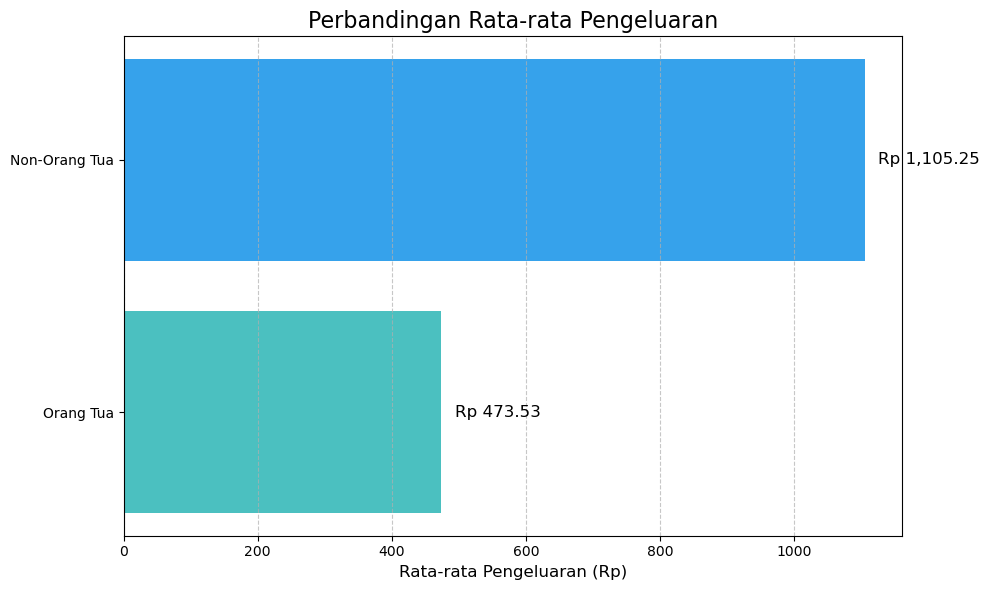

In [153]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data
categories = ['Orang Tua', 'Non-Orang Tua']
values = [473.53, 1105.25]

# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(categories, values, color=['#4bc0c0', '#36a2eb'])

# Menambahkan label dan judul
plt.xlabel('Rata-rata Pengeluaran (Rp)', fontsize=12)
plt.title('Perbandingan Rata-rata Pengeluaran', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan nilai pada bar
for i, v in enumerate(values):
    plt.text(v + 20, i, f'Rp {v:,.2f}', va='center', fontsize=12)

# Styling
plt.tight_layout()
plt.savefig('perbandingan_pengeluaran.png', dpi=300, bbox_inches='tight')
plt.show()

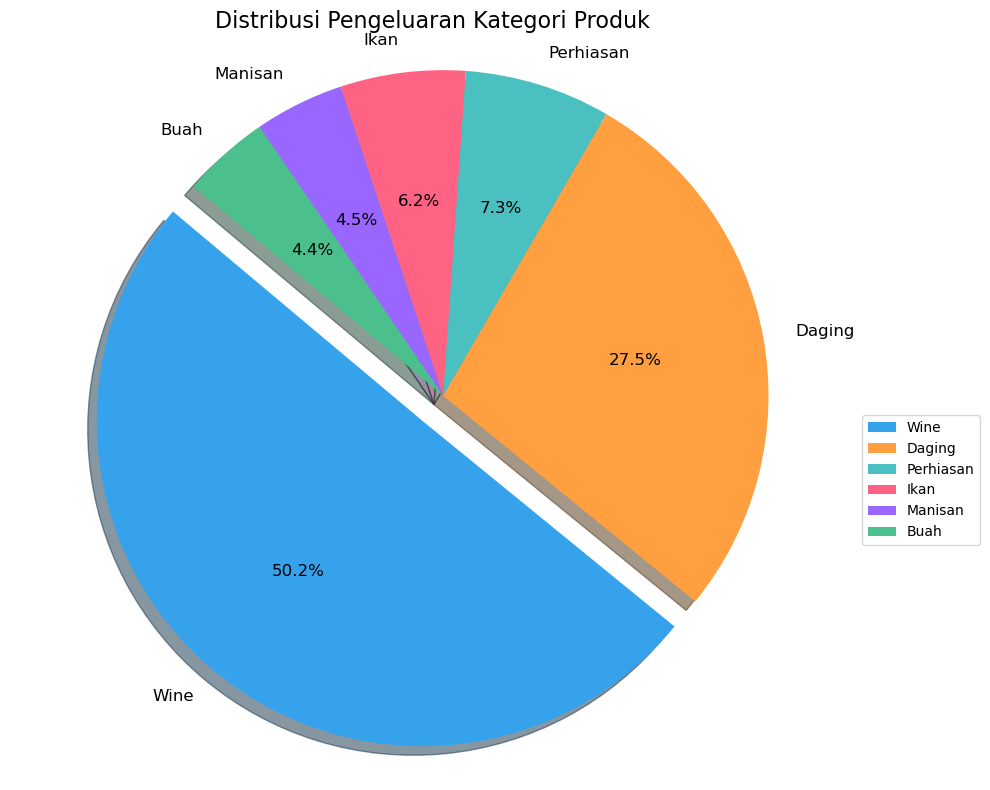

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Wine', 'Daging', 'Perhiasan', 'Ikan', 'Manisan', 'Buah']
sizes = [50.22, 27.53, 7.25, 6.20, 4.45, 4.35]
colors = ['#36a2eb', '#ff9f40', '#4bc0c0', '#ff6384', '#9966ff', '#4bc08d']
explode = (0.1, 0, 0, 0, 0, 0)  # eksplode slice pertama (Wine)

# Membuat pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 12})

# Menambahkan judul
plt.title('Distribusi Pengeluaran Kategori Produk', fontsize=16)
plt.axis('equal')  # Memastikan pie berbentuk lingkaran

# Menambahkan legenda
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('kategori_produk_favorit.png', dpi=300, bbox_inches='tight')
plt.show()

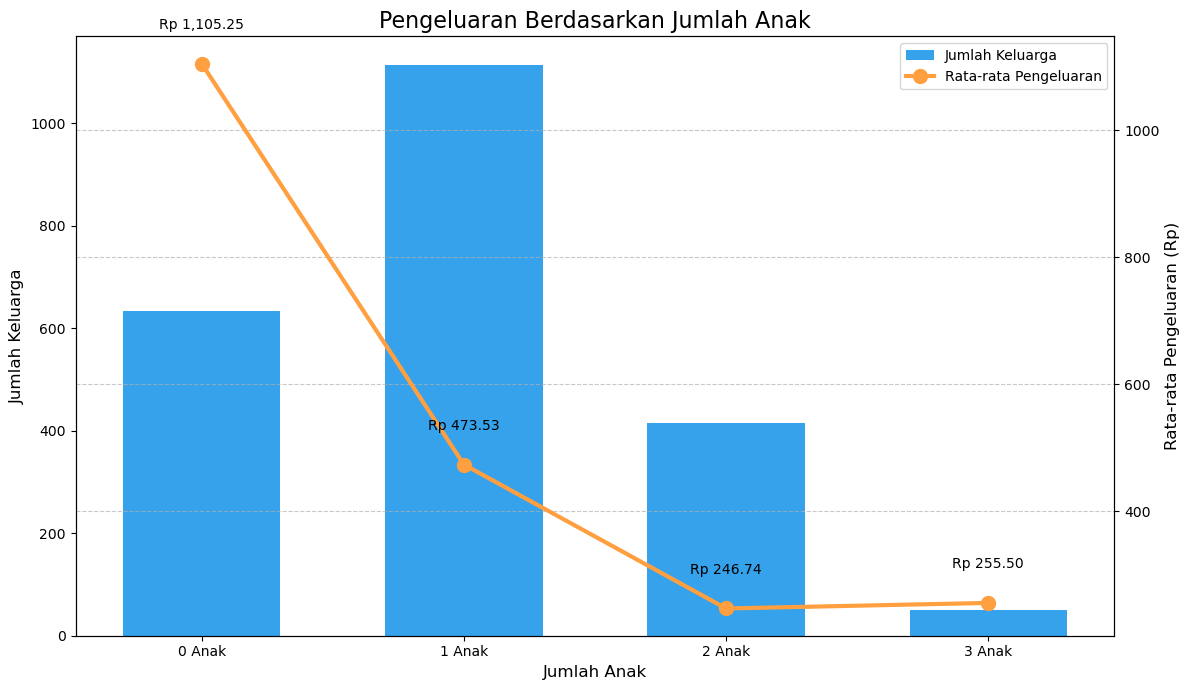

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['0 Anak', '1 Anak', '2 Anak', '3 Anak']
avg_spending = [1105.25, 473.53, 246.74, 255.50]
family_count = [633, 1114, 416, 50]

# Membuat gambar dan axes
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar chart untuk jumlah keluarga (ax1)
x = np.arange(len(categories))
width = 0.6
bars = ax1.bar(x, family_count, width, color='#36a2eb', label='Jumlah Keluarga')
ax1.set_ylabel('Jumlah Keluarga', fontsize=12)
ax1.set_xlabel('Jumlah Anak', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.tick_params(axis='y')

# Line chart untuk rata-rata pengeluaran (ax2)
ax2 = ax1.twinx()
line = ax2.plot(x, avg_spending, 'o-', linewidth=3, markersize=10, color='#ff9f40', label='Rata-rata Pengeluaran')
ax2.set_ylabel('Rata-rata Pengeluaran (Rp)', fontsize=12)
ax2.tick_params(axis='y')

# Menambahkan label data pada line
for i, v in enumerate(avg_spending):
    ax2.text(i, v + 50, f'Rp {v:,.2f}', ha='center', va='bottom', fontsize=10)

# Menambahkan judul
plt.title('Pengeluaran Berdasarkan Jumlah Anak', fontsize=16)

# Menambahkan legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('pengaruh_jumlah_anak.png', dpi=300, bbox_inches='tight')
plt.show()

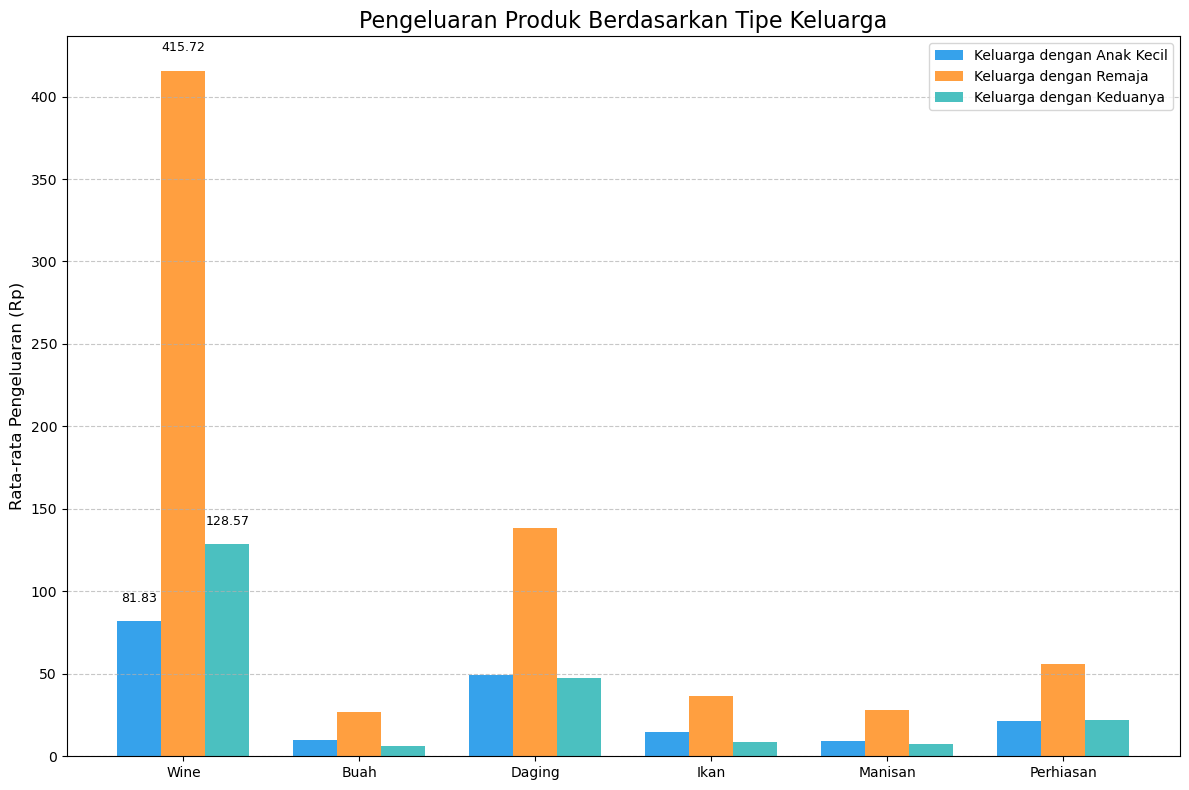

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Wine', 'Buah', 'Daging', 'Ikan', 'Manisan', 'Perhiasan']
kids = [81.83, 10.02, 49.04, 14.58, 9.39, 21.58]
teens = [415.72, 26.90, 138.67, 36.40, 28.26, 56.08]
both = [128.57, 6.44, 47.17, 8.89, 7.16, 22.21]

x = np.arange(len(categories))  # lokasi label
width = 0.25  # lebar bar

# Membuat plot
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, kids, width, label='Keluarga dengan Anak Kecil', color='#36a2eb')
rects2 = ax.bar(x, teens, width, label='Keluarga dengan Remaja', color='#ff9f40')
rects3 = ax.bar(x + width, both, width, label='Keluarga dengan Keduanya', color='#4bc0c0')

# Menambahkan label, judul dan legenda
ax.set_ylabel('Rata-rata Pengeluaran (Rp)', fontsize=12)
ax.set_title('Pengeluaran Produk Berdasarkan Tipe Keluarga', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Menambahkan nilai di atas bar untuk Wine (karena nilainya signifikan)
ax.text(x[0] - width, kids[0] + 10, f'{kids[0]}', ha='center', va='bottom', fontsize=9)
ax.text(x[0], teens[0] + 10, f'{teens[0]}', ha='center', va='bottom', fontsize=9)
ax.text(x[0] + width, both[0] + 10, f'{both[0]}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tipe_keluarga_preferensi.png', dpi=300, bbox_inches='tight')
plt.show()

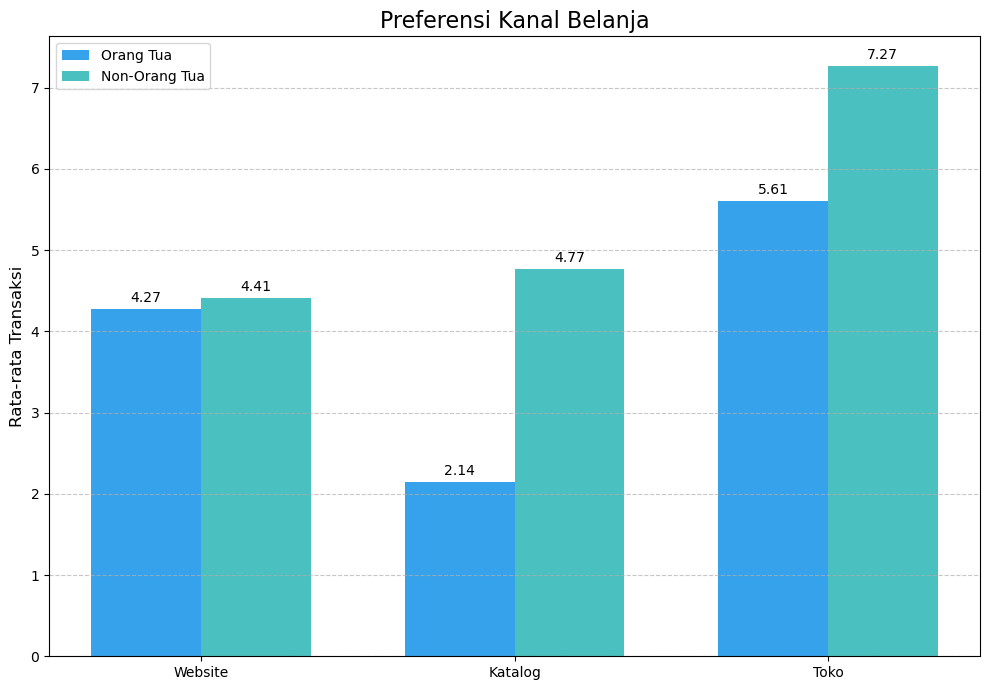

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Data
channels = ['Website', 'Katalog', 'Toko']
parents = [4.27, 2.14, 5.61]
non_parents = [4.41, 4.77, 7.27]

x = np.arange(len(channels))  # lokasi label
width = 0.35  # lebar bar

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width/2, parents, width, label='Orang Tua', color='#36a2eb')
rects2 = ax.bar(x + width/2, non_parents, width, label='Non-Orang Tua', color='#4bc0c0')

# Menambahkan label, judul dan legenda
ax.set_ylabel('Rata-rata Transaksi', fontsize=12)
ax.set_title('Preferensi Kanal Belanja', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(channels)
ax.legend()

# Menambahkan nilai di atas bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('preferensi_kanal_belanja.png', dpi=300, bbox_inches='tight')
plt.show()

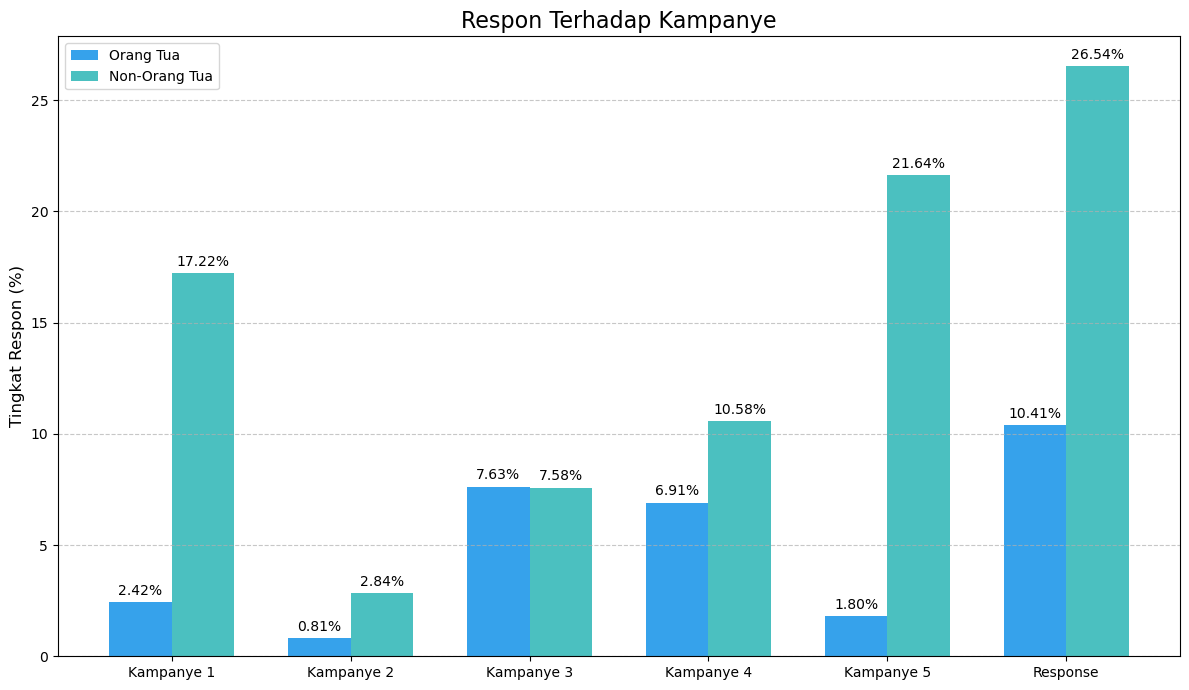

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Data
campaigns = ['Kampanye 1', 'Kampanye 2', 'Kampanye 3', 'Kampanye 4', 'Kampanye 5', 'Response']
parents = [2.42, 0.81, 7.63, 6.91, 1.80, 10.41]
non_parents = [17.22, 2.84, 7.58, 10.58, 21.64, 26.54]

x = np.arange(len(campaigns))  # lokasi label
width = 0.35  # lebar bar

# Membuat plot
fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, parents, width, label='Orang Tua', color='#36a2eb')
rects2 = ax.bar(x + width/2, non_parents, width, label='Non-Orang Tua', color='#4bc0c0')

# Menambahkan label, judul dan legenda
ax.set_ylabel('Tingkat Respon (%)', fontsize=12)
ax.set_title('Respon Terhadap Kampanye', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(campaigns)
ax.legend()

# Menambahkan nilai di atas bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('responsivitas_kampanye.png', dpi=300, bbox_inches='tight')
plt.show()